# Imputation Research Project (Zero Inflated Continuous Covariate) <img src="https://i.pinimg.com/564x/f5/8a/61/f58a61cf2d06682e309489166b5fb8fb.jpg" alt="Alt text image not displaying" width="300" align="right" style = "margin: 0 30px 0 0;"/>
## Notebook 1.1: Exploratory Data Analysis

**Author:** Chike Odenigbo

**Date:** November 22nd, 2022

**Notebook Structure:**

* 1.0 Preprocessing

* **1.1 Exploratory Data Analysis**

* 1.2 Masking

* 2.* Models


Water Sugar Alcohol

### Step 1: Import Requirements 

In [1]:
import pandas as pd
from scipy.stats import variation
from src.preprocessing.preprocessing import NumericalVariableCleaner, NumericalMasker # utility preprocessing packages found in src folder
import os
from src.visualization.visualize import histogram, box_plot, bar_plot
from itertools import chain, combinations
from pathlib import Path
from notebook_config import ROOT_DIR # setup.py file changed the root of the project so it is set in the config file
ROOT_DIR = ROOT_DIR.as_posix() # convert root path to windows readable path (i.e. change backslash to forward slash)
import json
import numpy as np
import functools as ft

In [2]:
notebook_nm = '1.1-explorations'
fig_dir = f'{ROOT_DIR}/reports/figures/'
output_prefix = notebook_nm

In [ ]:
nutrition_df = pd.read_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv')
nutrition_df

#### Utility functions

In [3]:
def all_subsets(ss):
    return list(chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1))))

#.head(20)
def convert(val):
    return (list(val))

### Step 2: Analysis

#### Food Tag NLP Counts 

In [5]:
nutrition_df['name_list'] = nutrition_df.name.str.lower().str.split(',')
s = nutrition_df['name_list'].apply(all_subsets).explode().value_counts()
food_n_grams_df = s.rename_axis('food_combinations').reset_index(name='observation_count')
food_n_grams_df = food_n_grams_df[food_n_grams_df.observation_count>40]
food_n_grams_df['food_combinations'] = food_n_grams_df.food_combinations.apply(convert)
food_n_grams_df['food_combinations_number_units'] = food_n_grams_df['food_combinations'].str.len()
food_n_grams_df['food_combinations'] = food_n_grams_df['food_combinations'].apply(', '.join)
unigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 1]
bigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 2]
trigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 3]

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_observation_count_hist.png


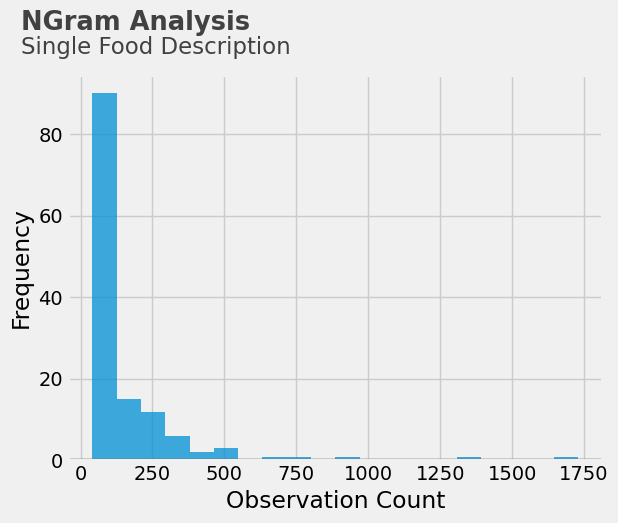

In [6]:
histogram(df = unigram, col = 'observation_count',output_prefix = f'{notebook_nm}-unigram',fig_dir = fig_dir, subtitle = 'Single Food Description', bins = 20,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_observation_count_boxplot.png


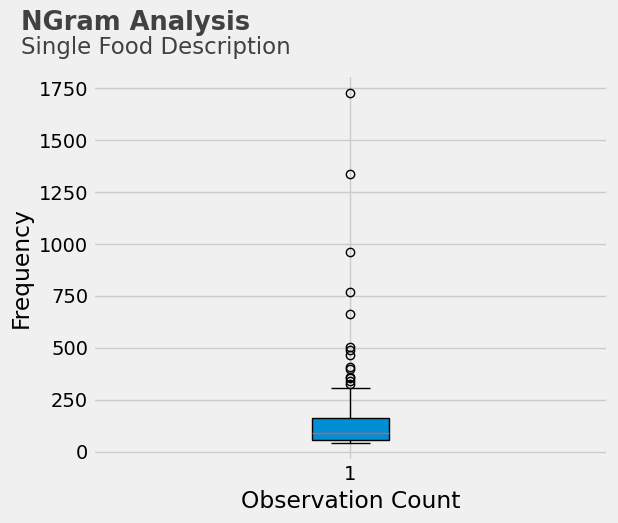

In [8]:
box_plot(df = unigram, col = 'observation_count', subtitle = 'Single Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-unigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_food_combinations_observation_count_barchart.png


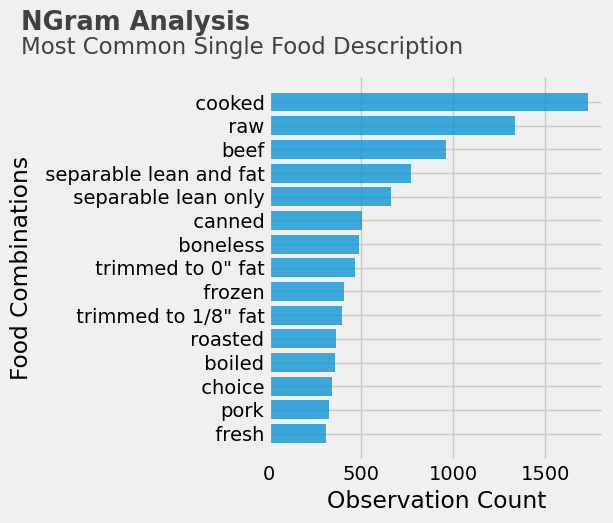

In [9]:
bar_plot(df = unigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Single Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-unigram', n_cols = 15)

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_observation_count_hist.png


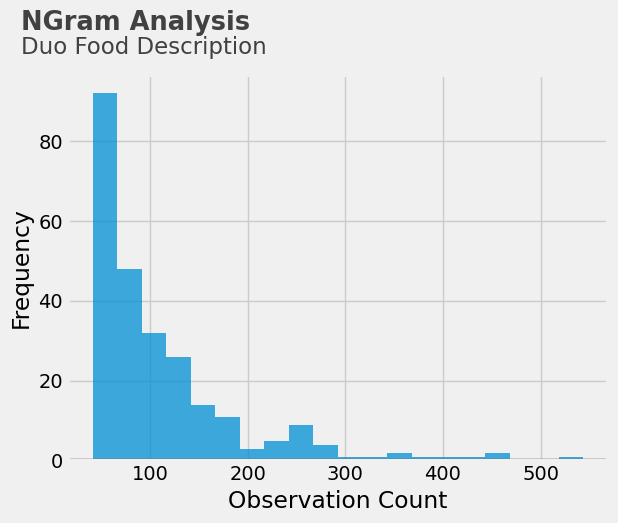

In [10]:
histogram(df = bigram, col = 'observation_count',output_prefix = f'{notebook_nm}-bigram',fig_dir = fig_dir, subtitle = 'Duo Food Description', bins = 20,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_observation_count_boxplot.png


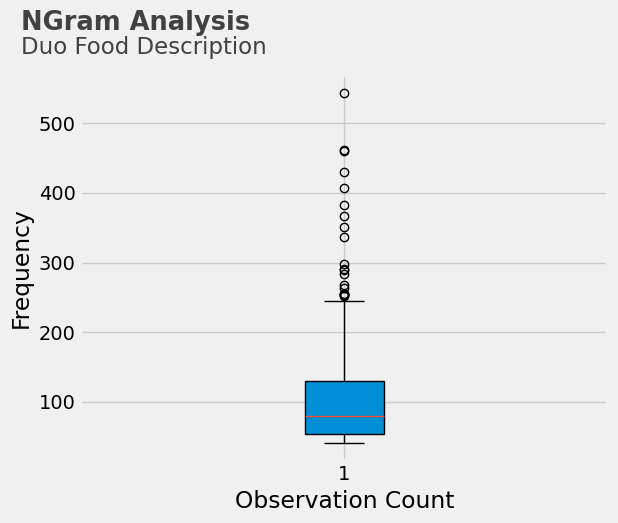

In [11]:
box_plot(df = bigram, col = 'observation_count', subtitle = 'Duo Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-bigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_food_combinations_observation_count_barchart.png


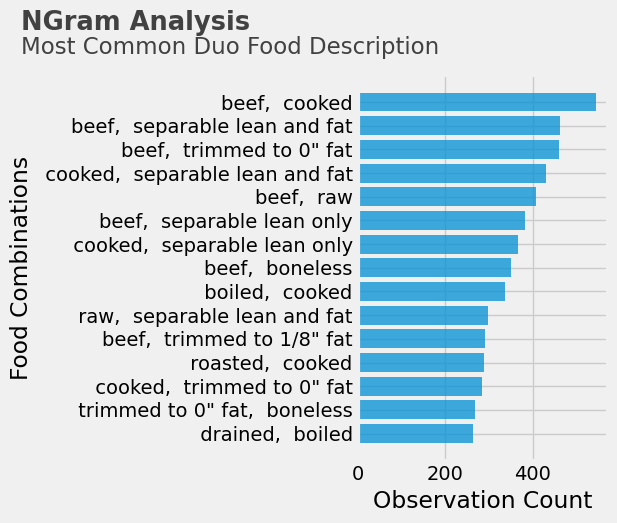

In [12]:
bar_plot(df = bigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Duo Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-bigram', n_cols = 15)

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_observation_count_hist.png


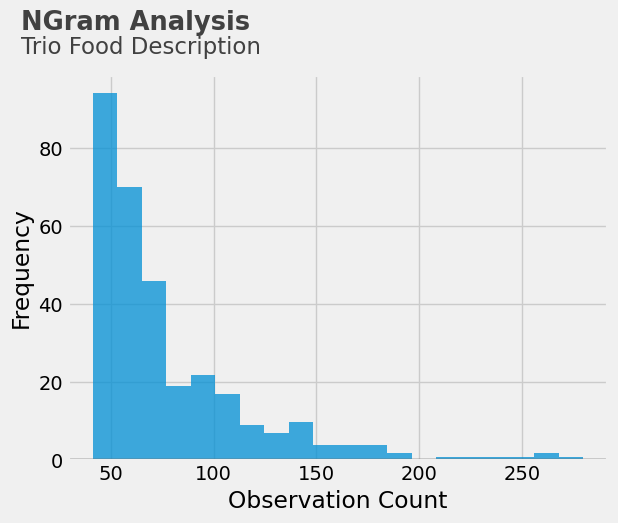

In [13]:
histogram(df = trigram, col = 'observation_count',output_prefix = f'{notebook_nm}-trigram',fig_dir = fig_dir, subtitle = 'Trio Food Description', bins = 20,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_observation_count_boxplot.png


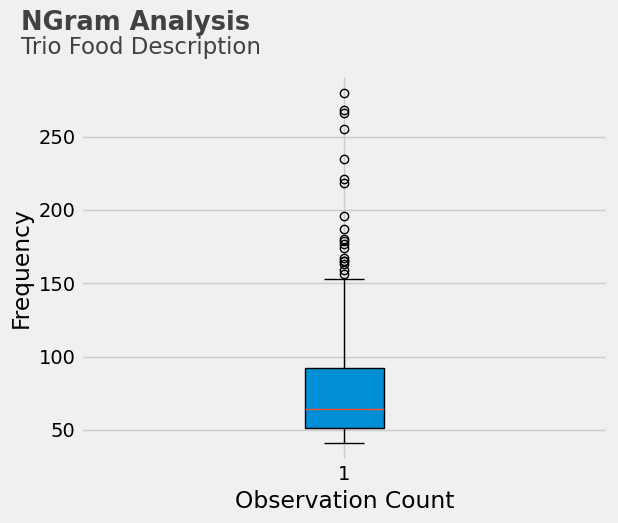

In [14]:
box_plot(df = trigram, col = 'observation_count', subtitle = 'Trio Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-trigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_food_combinations_observation_count_barchart.png


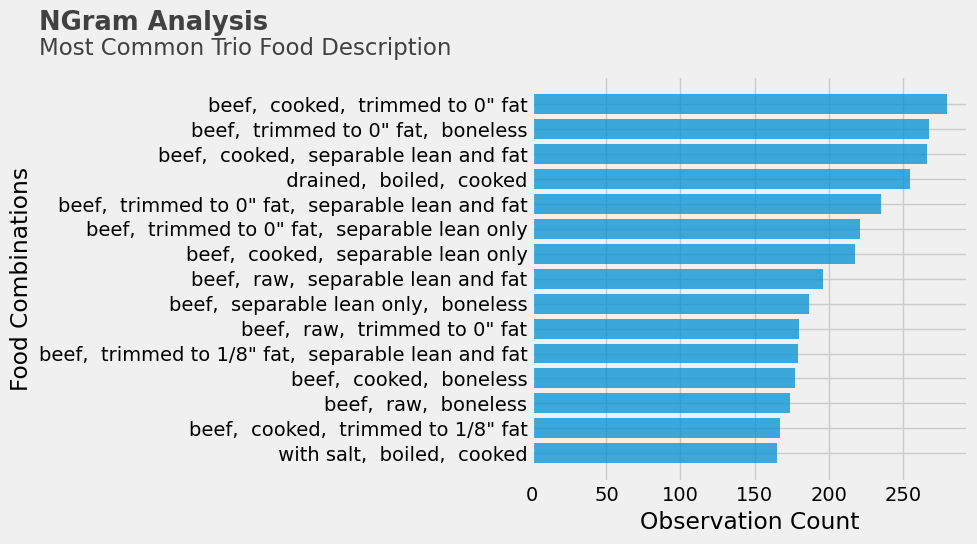

In [15]:
bar_plot(df = trigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Trio Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-trigram', n_cols = 15, width = 10, height = 5)

In [16]:
nutrition_df["name_short"] = nutrition_df["name_list"].str[0]
food_item_df = nutrition_df["name_short"].value_counts().rename_axis('food_item').reset_index(name = 'observation_count')
food_item_df = food_item_df[food_item_df.observation_count>10]

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_observation_count_hist.png


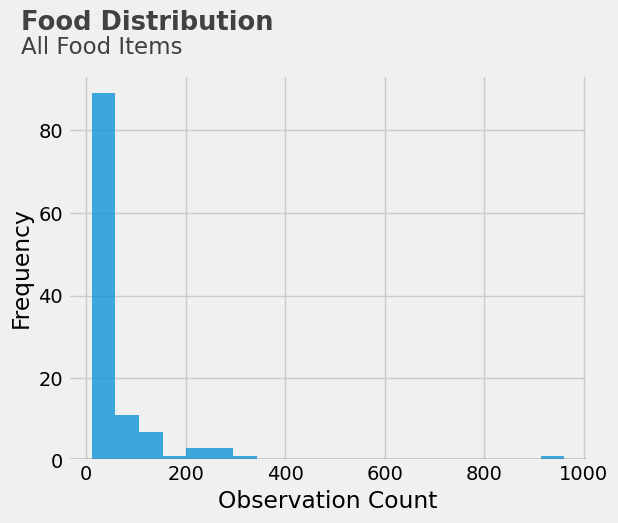

In [17]:
histogram(df = food_item_df, col = 'observation_count',output_prefix = f'{notebook_nm}-food-item',fig_dir = fig_dir, subtitle = 'All Food Items', bins = 20,title ='Food Distribution')

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_observation_count_boxplot.png


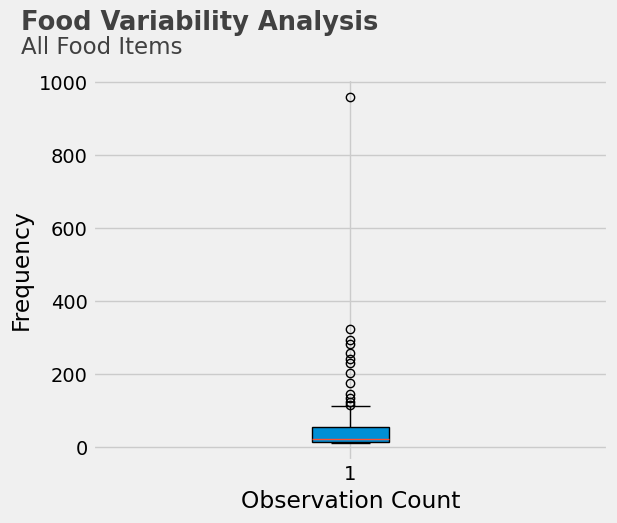

In [18]:
box_plot(df = food_item_df, col = 'observation_count', subtitle = 'All Food Items', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-food-item',title ='Food Variability Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_food_item_observation_count_barchart.png


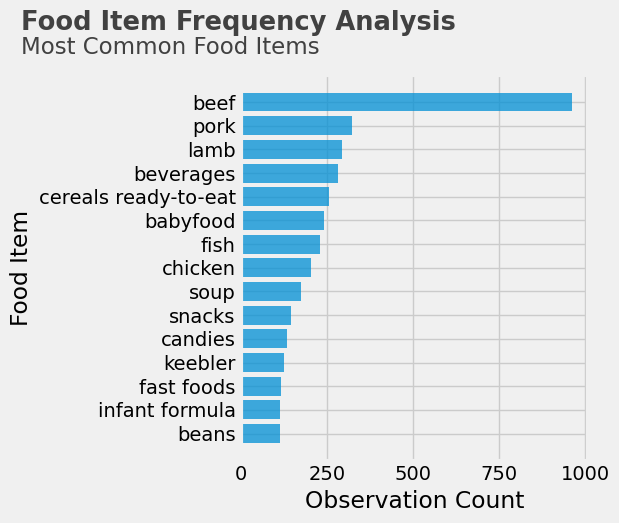

In [19]:
bar_plot(df = food_item_df,x = 'food_item',y = 'observation_count',title = 'Food Item Frequency Analysis',subtitle = 'Most Common Food Items',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-food-item', n_cols = 15)

In [ ]:
### 

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_variation_coefficient_hist.png


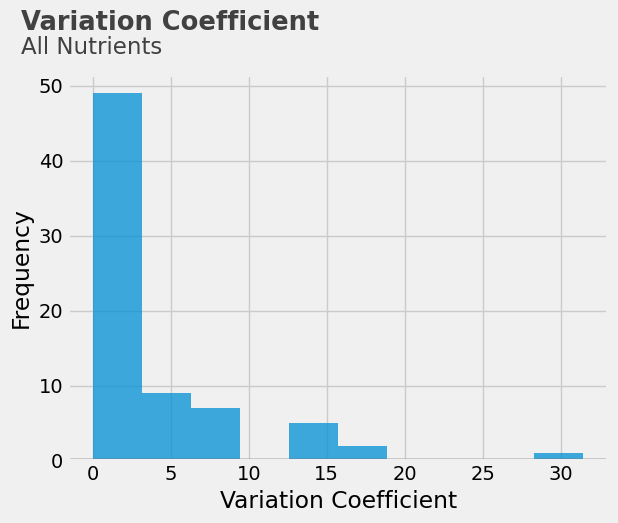

In [20]:
cv_list = np.std(nutrition_df, axis=0, ddof=1)/np.mean(nutrition_df, axis=0)
cv_df = cv_list.rename_axis('nutrient').reset_index(name='variation_coefficient').sort_values('variation_coefficient',ascending = False)
histogram(df = cv_df, col = 'variation_coefficient',output_prefix = f'{notebook_nm}-coefficient-variation',fig_dir = fig_dir, subtitle = 'All Nutrients', bins = 10)

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_variation_coefficient_boxplot.png


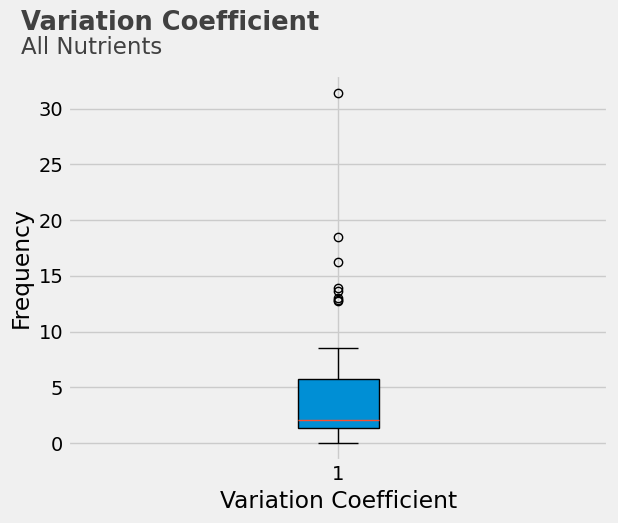

In [21]:
box_plot(df = cv_df, col = 'variation_coefficient', subtitle = 'All Nutrients', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-coefficient-variation')

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_nutrient_variation_coefficient_barchart.png


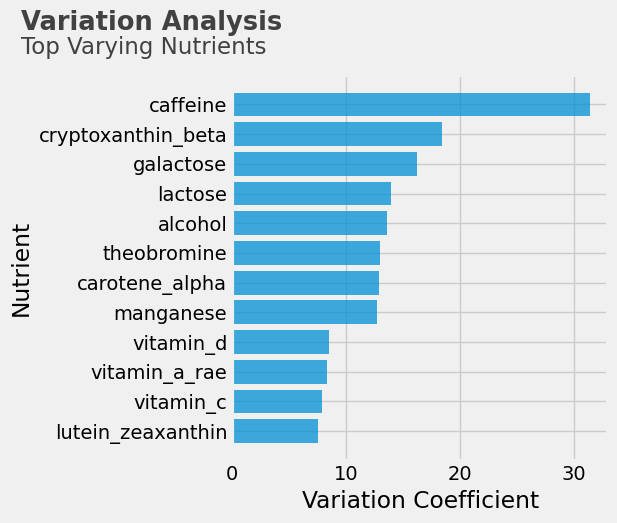

In [22]:
bar_plot(df = cv_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Top Varying Nutrients',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-coefficient-variation', n_cols = 12)

In [23]:
missing_df = (nutrition_df.isnull().mean() * 100).rename_axis('nutrient').reset_index(name='missing_rate').sort_values('missing_rate',ascending=False)
missing_df.head(10)

nutrient  missing_rate
3   saturated_fat     18.090795
0            name      0.000000
48  phenylalanine      0.000000
55   carbohydrate      0.000000
54         valine      0.000000
53       tyrosine      0.000000
52     tryptophan      0.000000
51      threonine      0.000000
50         serine      0.000000
49        proline      0.000000

### Step 2: Clean Data

In [24]:
Q1 = nutrition_df.quantile(0.25)
Q3 = nutrition_df.quantile(0.75)
IQR = Q3 - Q1
outlier_df=(((nutrition_df < (Q1 - 1.5 * IQR)) | (nutrition_df > (Q3 + 1.5 * IQR))).sum()).rename_axis('nutrient').reset_index(name='outlier_count').sort_values('outlier_count',ascending = False)

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_nutrient_outlier_count_barchart.png


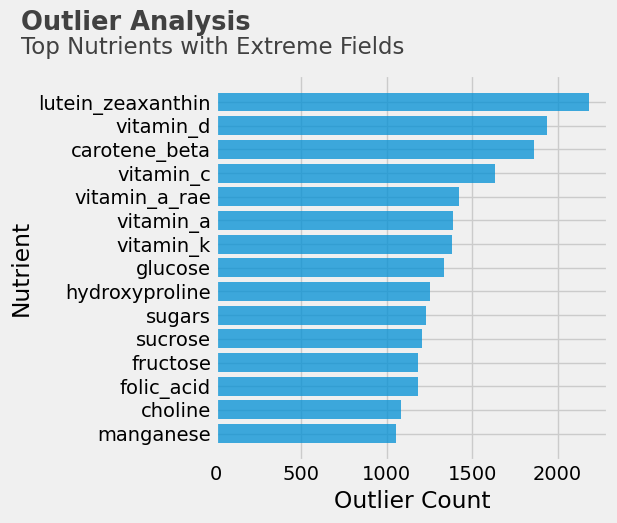

In [25]:
bar_plot(df = outlier_df,x = 'nutrient',y = 'outlier_count',title = 'Outlier Analysis',subtitle = 'Top Nutrients with Extreme Fields',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-outliers', n_cols = 15)

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_outlier_count_boxplot.png


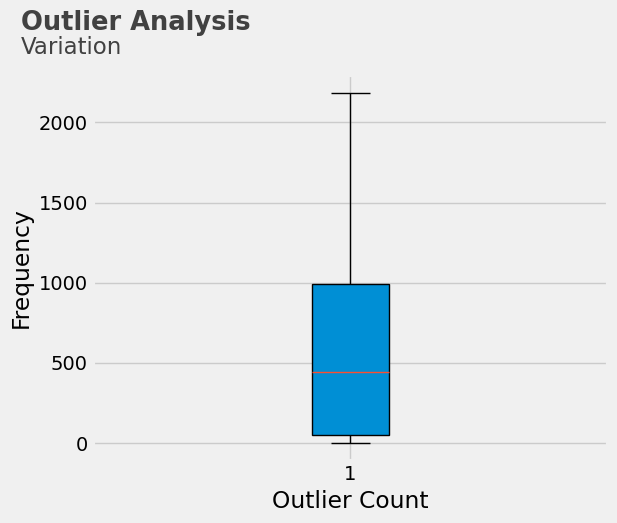

In [26]:
box_plot(df = outlier_df, col = 'outlier_count', subtitle = 'Variation', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-outliers',title = 'Outlier Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_outlier_count_hist.png


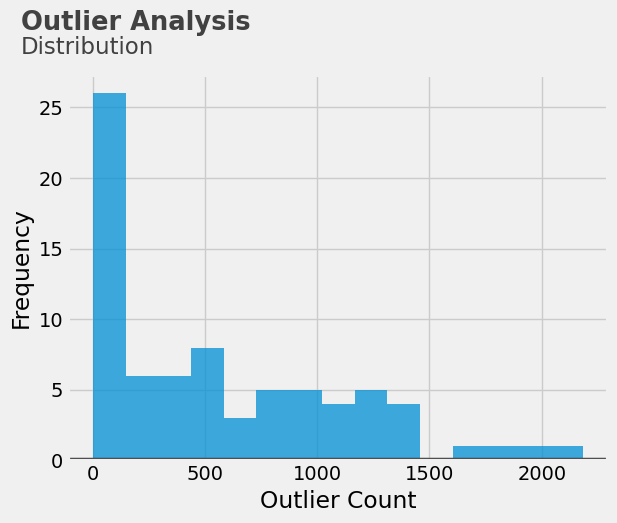

In [27]:
histogram(df = outlier_df, col = 'outlier_count',output_prefix = f'{notebook_nm}-outliers',fig_dir = fig_dir, subtitle = 'Distribution', bins = 15,title ='Outlier Analysis')

In [28]:
zero_counts_df = pd.DataFrame({'nutrient':nutrition_df.columns,
              'zero_value_counts':np.count_nonzero(nutrition_df.fillna(1)==0,axis=0),
               'observation_count':nutrition_df.shape[0]}).sort_values('zero_value_counts',ascending = False)
zero_counts_df['z_score_zero_value_counts'] = (zero_counts_df['zero_value_counts'] - zero_counts_df['zero_value_counts'].mean())/zero_counts_df['zero_value_counts'].std(ddof=1)
zero_counts_df['percent_zero'] = zero_counts_df['zero_value_counts'] / zero_counts_df['observation_count']
zero_counts_df.head(20)

nutrient  zero_value_counts  observation_count  \
69             alcohol               8715               8789   
59           galactose               8602               8789   
72         theobromine               8545               8789   
71            caffeine               8488               8789   
61             lactose               8390               8789   
62             maltose               8092               8789   
15      carotene_alpha               8000               8789   
17  cryptoxanthin_beta               7976               8789   
8           folic_acid               7606               8789   
58            fructose               7605               8789   
63             sucrose               7584               8789   
43      hydroxyproline               7533               8789   
60             glucose               7453               8789   
18   lutein_zeaxanthin               6603               8789   
22           vitamin_d               6469               8789   
16       carotene_beta               6359               8789   
21           vitamin_c               4911               8789   
25           vitamin_k               4652               8789   
6              choline               4183               8789   
19         vitamin_b12               4135               8789   

    z_score_zero_value_counts  percent_zero  
69                   1.964985      0.991580  
59                   1.922415      0.978723  
72                   1.900942      0.972238  
71                   1.879468      0.965753  
61                   1.842549      0.954602  
62                   1.730285      0.920696  
15                   1.695626      0.910229  
17                   1.686584      0.907498  
8                    1.547196      0.865400  
58                   1.546819      0.865286  
63                   1.538908      0.862897  
43                   1.519695      0.857094  
60                   1.489556      0.847992  
18                   1.169339      0.751280  
22                   1.118858      0.736034  
16                   1.077418      0.723518  
21                   0.531918      0.558767  
25                   0.434346      0.529298  
6                    0.257661      0.475936  
19                   0.239578      0.470474

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-values_percent_zero_hist.png


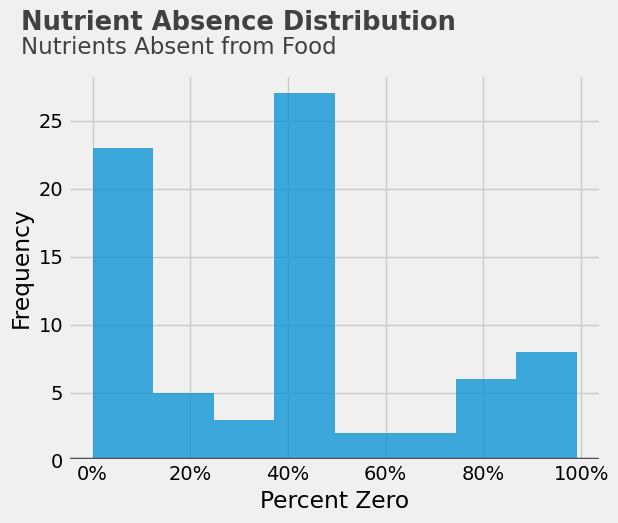

In [29]:
histogram(df = zero_counts_df, col = 'percent_zero',output_prefix = f'{notebook_nm}-zero-values',fig_dir = fig_dir, subtitle = 'Nutrients Absent from Food', bins = 8,title ='Nutrient Absence Distribution',percent_col = 'x')

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-values_percent_zero_boxplot.png


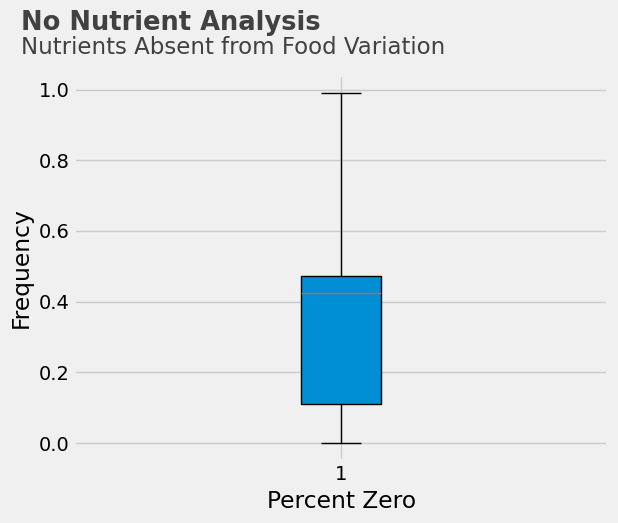

In [30]:
box_plot(df = zero_counts_df, col = 'percent_zero', subtitle = 'Nutrients Absent from Food Variation', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-zero-values',title = 'No Nutrient Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-values_nutrient_percent_zero_barchart.png


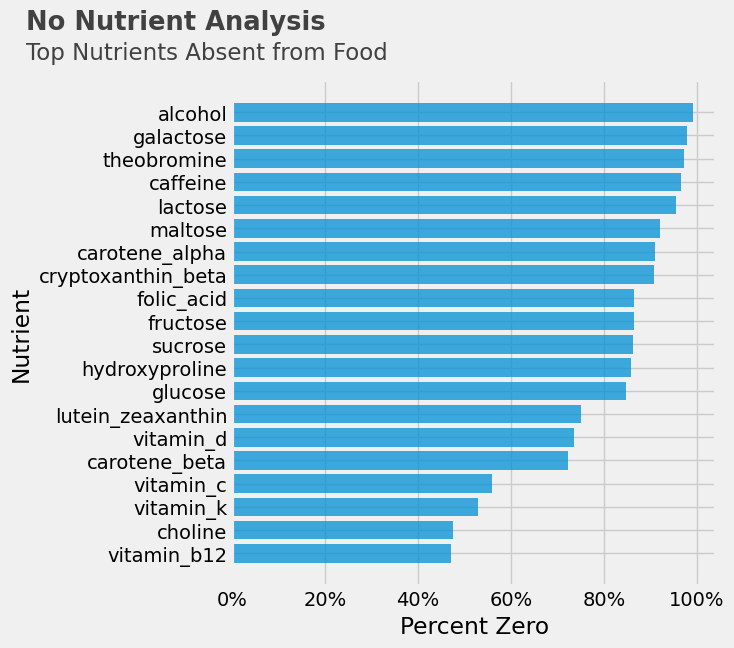

In [31]:
bar_plot(df = zero_counts_df,x = 'nutrient',y = 'percent_zero',title = 'No Nutrient Analysis',subtitle = 'Top Nutrients Absent from Food',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-zero-values', height = 6, width =7.5,n_cols = 20,percent_col = 'x')

In [32]:
stop

NameError: name 'stop' is not defined

In [125]:
median_df = nutrition_df.median().rename_axis('nutrient').reset_index(name='median_value')

In [126]:
dfs = [zero_counts_df, outlier_df, cv_df, missing_df, median_df]
full_nutrient_df = ft.reduce(lambda left, right: pd.merge(left, right, on='nutrient'), dfs)
full_nutrient_df

nutrient  zero_value_counts  observation_count  \
0         alcohol               8715               8789   
1       galactose               8602               8789   
2     theobromine               8545               8789   
3        caffeine               8488               8789   
4         lactose               8390               8789   
..            ...                ...                ...   
68        protein                358               8789   
69         sodium                355               8789   
70          water                 96               8789   
71   serving_size                  0               8789   
72  saturated_fat                  0               8789   

    z_score_zero_value_counts  percent_zero  outlier_count  \
0                    1.964985      0.991580             74   
1                    1.922415      0.978723            187   
2                    1.900942      0.972238            244   
3                    1.879468      0.965753            301   
4                    1.842549      0.954602            399   
..                        ...           ...            ...   
68                  -1.183318      0.040733             49   
69                  -1.184448      0.040391            473   
70                  -1.282020      0.010923              0   
71                  -1.318186      0.000000              0   
72                  -1.318186      0.000000            535   

    variation_coefficient  missing_rate  median_value  
0               13.615567      0.000000          0.00  
1               16.214746      0.000000          0.00  
2               12.982805      0.000000          0.00  
3               31.458645      0.000000          0.00  
4               13.917778      0.000000          0.00  
..                    ...           ...           ...  
68               0.928165      0.000000          8.02  
69               3.065803      0.000000         84.00  
70               0.568690      0.000000         63.08  
71               0.000000      0.000000        100.00  
72               1.640199     18.090795          2.20  

[73 rows x 9 columns]

In [128]:
full_nutrient_df['tertile_zero_value'] = pd.cut(full_nutrient_df['percent_zero'], 3, labels=[3,2,1])
full_nutrient_df

nutrient  zero_value_counts  observation_count  \
0         alcohol               8715               8789   
1       galactose               8602               8789   
2     theobromine               8545               8789   
3        caffeine               8488               8789   
4         lactose               8390               8789   
..            ...                ...                ...   
68        protein                358               8789   
69         sodium                355               8789   
70          water                 96               8789   
71   serving_size                  0               8789   
72  saturated_fat                  0               8789   

    z_score_zero_value_counts  percent_zero  outlier_count  \
0                    1.964985      0.991580             74   
1                    1.922415      0.978723            187   
2                    1.900942      0.972238            244   
3                    1.879468      0.965753            301   
4                    1.842549      0.954602            399   
..                        ...           ...            ...   
68                  -1.183318      0.040733             49   
69                  -1.184448      0.040391            473   
70                  -1.282020      0.010923              0   
71                  -1.318186      0.000000              0   
72                  -1.318186      0.000000            535   

    variation_coefficient  missing_rate  median_value tertile_zero_value  
0               13.615567      0.000000          0.00                  1  
1               16.214746      0.000000          0.00                  1  
2               12.982805      0.000000          0.00                  1  
3               31.458645      0.000000          0.00                  1  
4               13.917778      0.000000          0.00                  1  
..                    ...           ...           ...                ...  
68               0.928165      0.000000          8.02                  3  
69               3.065803      0.000000         84.00                  3  
70               0.568690      0.000000         63.08                  3  
71               0.000000      0.000000        100.00                  3  
72               1.640199     18.090795          2.20                  3  

[73 rows x 10 columns]

In [37]:
tertile_1_zero_val_col_df = full_nutrient_df[full_nutrient_df['tertile_zero_value'] == 1]
tertile_2_zero_val_col_df = full_nutrient_df[full_nutrient_df['tertile_zero_value'] == 2]
tertile_3_zero_val_col_df = full_nutrient_df[full_nutrient_df['tertile_zero_value'] == 3]
tertile_1_zero_val_col_df.sort_values('percent_zero',ascending = True)

nutrient  zero_value_counts  observation_count  \
15       carotene_beta               6359               8789   
14           vitamin_d               6469               8789   
13   lutein_zeaxanthin               6603               8789   
12             glucose               7453               8789   
11      hydroxyproline               7533               8789   
10             sucrose               7584               8789   
9             fructose               7605               8789   
8           folic_acid               7606               8789   
7   cryptoxanthin_beta               7976               8789   
6       carotene_alpha               8000               8789   
5              maltose               8092               8789   
4              lactose               8390               8789   
3             caffeine               8488               8789   
2          theobromine               8545               8789   
1            galactose               8602               8789   
0              alcohol               8715               8789   

    z_score_zero_value_counts  percent_zero  outlier_count  \
15                   1.077418      0.723518           1862   
14                   1.118858      0.736034           1938   
13                   1.169339      0.751280           2186   
12                   1.489556      0.847992           1336   
11                   1.519695      0.857094           1256   
10                   1.538908      0.862897           1205   
9                    1.546819      0.865286           1184   
8                    1.547196      0.865400           1183   
7                    1.686584      0.907498            813   
6                    1.695626      0.910229            789   
5                    1.730285      0.920696            697   
4                    1.842549      0.954602            399   
3                    1.879468      0.965753            301   
2                    1.900942      0.972238            244   
1                    1.922415      0.978723            187   
0                    1.964985      0.991580             74   

    variation_coefficient  missing_rate tertile_zero_value  
15               7.273375           0.0                  1  
14               8.491550           0.0                  1  
13               7.550377           0.0                  1  
12               5.859980           0.0                  1  
11               3.043873           0.0                  1  
10               6.850190           0.0                  1  
9                5.863018           0.0                  1  
8                5.711113           0.0                  1  
7               18.482390           0.0                  1  
6               12.871048           0.0                  1  
5                6.143803           0.0                  1  
4               13.917778           0.0                  1  
3               31.458645           0.0                  1  
2               12.982805           0.0                  1  
1               16.214746           0.0                  1  
0               13.615567           0.0                  1

In [129]:
full_nutrient_df[full_nutrient_df['nutrient'] == 'water']

nutrient  zero_value_counts  observation_count  z_score_zero_value_counts  \
70    water                 96               8789                   -1.28202   

    percent_zero  outlier_count  variation_coefficient  missing_rate  \
70      0.010923              0                0.56869           0.0   

    median_value tertile_zero_value  
70         63.08                  3

In [38]:
tertile_2_zero_val_col_df.sort_values('percent_zero',ascending = False)

nutrient  zero_value_counts  observation_count  \
16                vitamin_c               4911               8789   
17                vitamin_k               4652               8789   
18                  choline               4183               8789   
19              vitamin_b12               4135               8789   
20              cholesterol               4079               8789   
21  fatty_acids_total_trans               4079               8789   
22                    fiber               4053               8789   
23            vitamin_a_rae               4025               8789   
24                   sugars               3966               8789   
25            aspartic_acid               3949               8789   
26                  cystine               3910               8789   
27               tryptophan               3810               8789   
28                  proline               3805               8789   
29                   serine               3799               8789   
30                  glycine               3798               8789   
31                  alanine               3797               8789   
32            glutamic_acid               3790               8789   
33                 tyrosine               3776               8789   
34                 arginine               3754               8789   
35                histidine               3748               8789   
36                threonine               3745               8789   
37            phenylalanine               3744               8789   
38                   valine               3741               8789   
39               isoleucine               3741               8789   
40                  leucine               3741               8789   
41               methionine               3732               8789   
42                   lysine               3728               8789   
43         tocopherol_alpha               3360               8789   
44                vitamin_e               3360               8789   
45                vitamin_a               2943               8789   

    z_score_zero_value_counts  percent_zero  outlier_count  \
16                   0.531918      0.558767           1631   
17                   0.434346      0.529298           1381   
18                   0.257661      0.475936           1085   
19                   0.239578      0.470474            733   
20                   0.218481      0.464103            184   
21                   0.218481      0.464103            184   
22                   0.208687      0.461145            805   
23                   0.198138      0.457959           1422   
24                   0.175911      0.451246           1230   
25                   0.169507      0.449312             41   
26                   0.154815      0.444874             42   
27                   0.117142      0.433496             60   
28                   0.115258      0.432928             96   
29                   0.112998      0.432245             53   
30                   0.112621      0.432131             47   
31                   0.112245      0.432017             24   
32                   0.109608      0.431221             38   
33                   0.104333      0.429628             41   
34                   0.096045      0.427125             67   
35                   0.093785      0.426442             31   
36                   0.092655      0.426101             26   
37                   0.092278      0.425987             38   
38                   0.091148      0.425646             39   
39                   0.091148      0.425646             32   
40                   0.091148      0.425646             22   
41                   0.087757      0.424622             16   
42                   0.086251      0.424167             15   
43                  -0.052385      0.382296           1036   
44                  -0.052385      0.382296           1036   
45                 

In [39]:
tertile_3_zero_val_col_df

nutrient  zero_value_counts  observation_count  \
46             pantothenic_acid               2497               8789   
47                    manganese               2339               8789   
48                 carbohydrate               2158               8789   
49                     selenium               2090               8789   
50                       folate               1896               8789   
51                       copper               1515               8789   
52                   vitamin_b6               1278               8789   
53  monounsaturated_fatty_acids               1017               8789   
54                    magnesium               1000               8789   
55  polyunsaturated_fatty_acids                992               8789   
56                      thiamin                990               8789   
57                   riboflavin                951               8789   
58                         zink                938               8789   
59                       niacin                927               8789   
60                  phosphorous                841               8789   
61        saturated_fatty_acids                780               8789   
62                      calcium                679               8789   
63                    potassium                610               8789   
64                         irom                468               8789   
65                          ash                454               8789   
66                    total_fat                451               8789   
67                          fat                374               8789   
68                      protein                358               8789   
69                       sodium                355               8789   
70                        water                 96               8789   
71                 serving_size                  0               8789   
72                saturated_fat                  0               8789   

    z_score_zero_value_counts  percent_zero  outlier_count  \
46                  -0.377500      0.284105            301   
47                  -0.437022      0.266128           1054   
48                  -0.505210      0.245534            110   
49                  -0.530827      0.237797            165   
50                  -0.603912      0.215724           1016   
51                  -0.747445      0.172375            891   
52                  -0.836729      0.145409            409   
53                  -0.935055      0.115713            547   
54                  -0.941459      0.113779           1003   
55                  -0.944473      0.112868            982   
56                  -0.945226      0.112641            854   
57                  -0.959919      0.108203            569   
58                  -0.964816      0.106724            530   
59                  -0.968960      0.105473            301   
60                  -1.001359      0.095688            265   
61                  -1.024339      0.088747            679   
62                  -1.062388      0.077256            992   
63                  -1.088382      0.069405            378   
64                  -1.141878      0.053248            687   
65                  -1.147152      0.051655            566   
66                  -1.148282      0.051314            475   
67                  -1.177290      0.042553            492   
68                  -1.183318      0.040733             49   
69                  -1.184448      0.040391            473   
70                  -1.282020      0.010923              0   
71                  -1.318186      0.000000              0   
72                  -1.318186      0.000000            535   

    variation_coefficient  missing_rate tertile_zero_value  
46               2.584456      0.000000                  3  
47              12.708819      0.000000                  3  
48               1.232545      0.000000                  3

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-1-coefficient-variation_nutrient_variation_coefficient_barchart.png


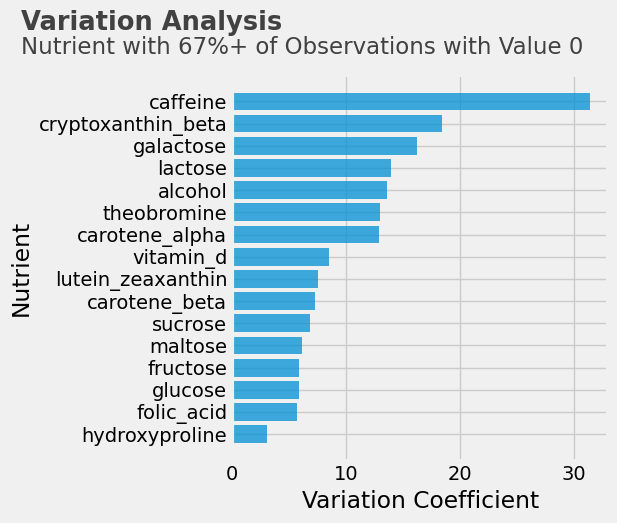

In [40]:
bar_plot(df = tertile_1_zero_val_col_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Nutrient with 67%+ of Observations with Value 0',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-zero-value-tert-1-coefficient-variation', n_cols = 17)

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-2-coefficient-variation_nutrient_variation_coefficient_barchart.png


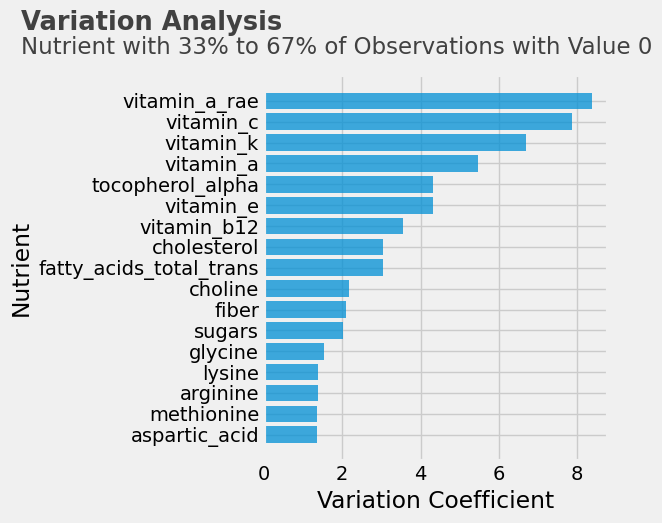

In [41]:
bar_plot(df = tertile_2_zero_val_col_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Nutrient with 33% to 67% of Observations with Value 0',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-zero-value-tert-2-coefficient-variation', n_cols = 17)

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-3-coefficient-variation_nutrient_variation_coefficient_barchart.png


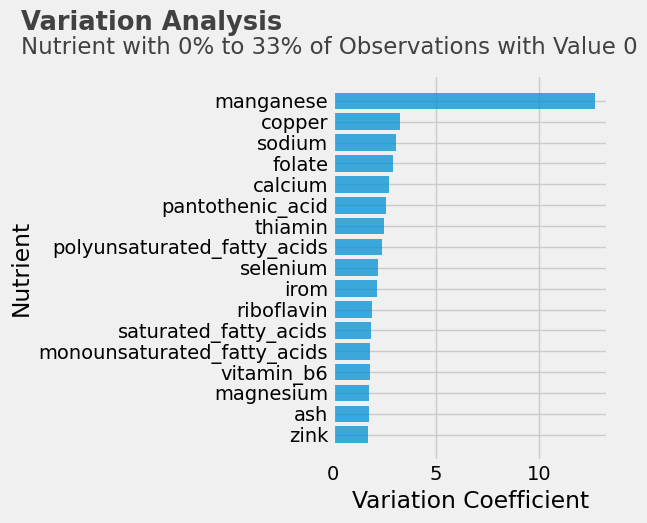

In [42]:
bar_plot(df = tertile_3_zero_val_col_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Nutrient with 0% to 33% of Observations with Value 0',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-zero-value-tert-3-coefficient-variation', n_cols = 17)

In [ ]:
nutrition_df[['name','carotene_beta']].nlargest(45,'carotene_beta')

Image found in the "reports/figures" folder saved under 1.1-explorations-caffeine-var-sel_caffeine_hist.png


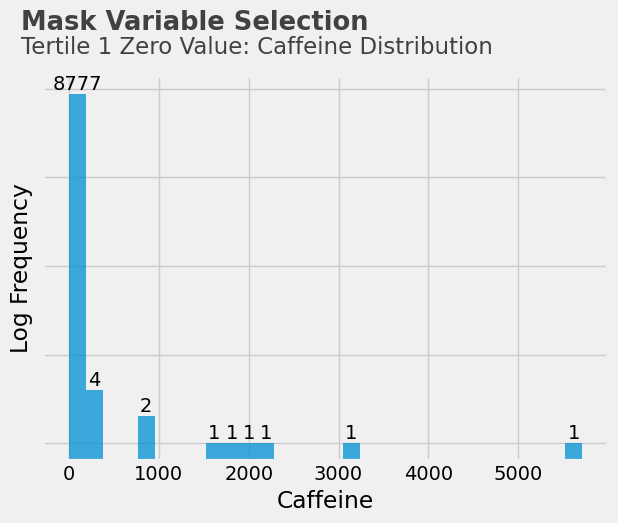

In [121]:
histogram(df = nutrition_df, col = 'caffeine',output_prefix = f'{notebook_nm}-caffeine-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Caffeine Distribution', bins = 30, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-lactose-var-sel_lactose_hist.png


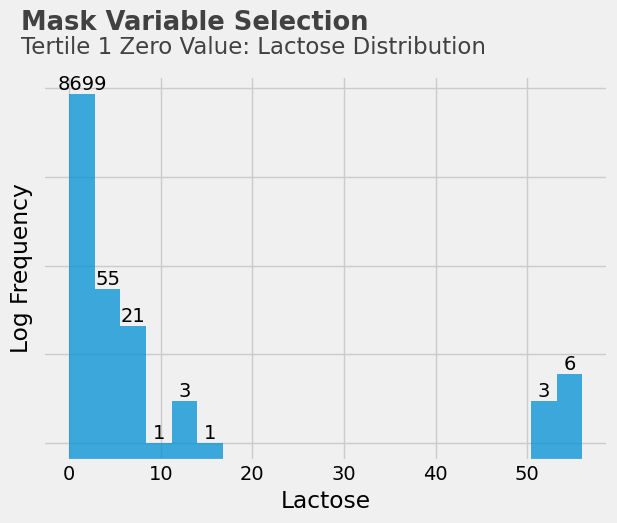

In [63]:
histogram(df = nutrition_df, col = 'lactose',output_prefix = f'{notebook_nm}-lactose-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Lactose Distribution', bins = 20, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-fructose-var-sel_fructose_hist.png


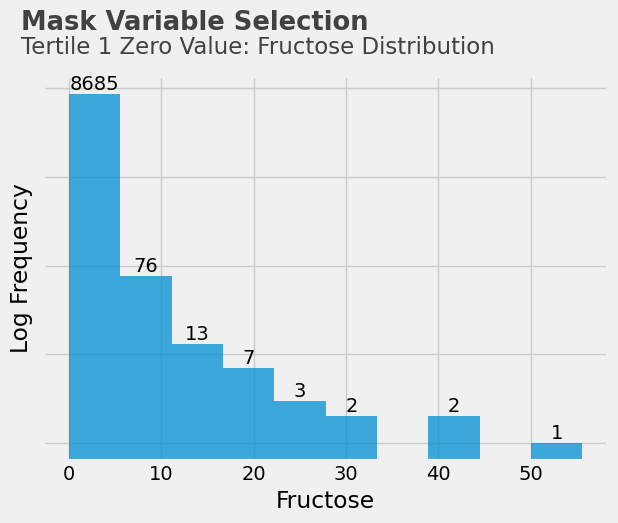

In [60]:
histogram(df = nutrition_df, col = 'fructose',output_prefix = f'{notebook_nm}-fructose-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Fructose Distribution', bins = 10, log_scale = True)

In [124]:
pd.set_option('display.max_columns',None)
nutrition_df.median().rename_axis('nutrient').reset_index(name='median_value')

nutrient  median_value
0    serving_size        100.00
1       total_fat          5.10
2   saturated_fat          2.20
3     cholesterol          2.00
4          sodium         84.00
..            ...           ...
68        alcohol          0.00
69            ash          1.17
70       caffeine          0.00
71    theobromine          0.00
72          water         63.08

[73 rows x 2 columns]

Image found in the "reports/figures" folder saved under 1.1-explorations-glucose-var-sel_total_fat_hist.png


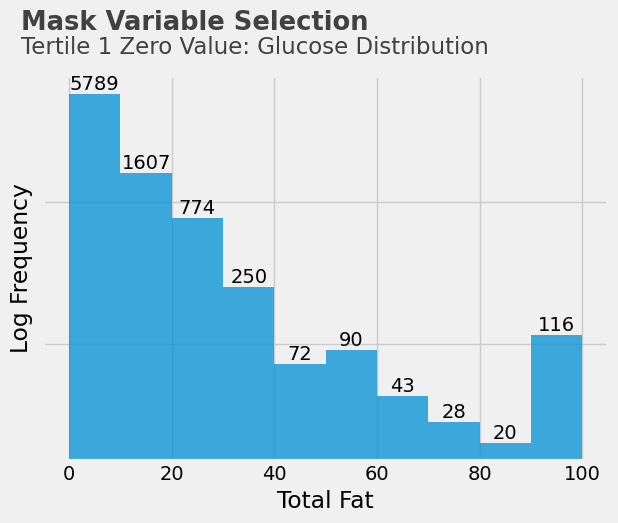

In [115]:
histogram(df = nutrition_df, col = 'total_fat',output_prefix = f'{notebook_nm}-glucose-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Glucose Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-glucose-var-sel_glucose_hist.png


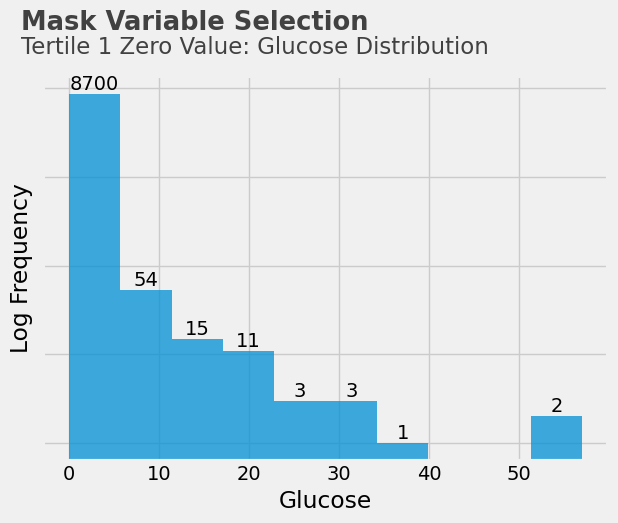

In [61]:
histogram(df = nutrition_df, col = 'glucose',output_prefix = f'{notebook_nm}-glucose-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Glucose Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-cryptoxanthin_beta-var-sel_cryptoxanthin_beta_hist.png


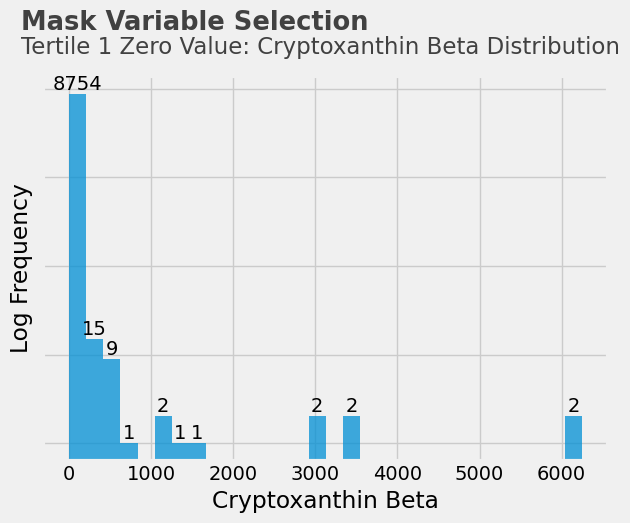

In [68]:
histogram(df = nutrition_df, col = 'cryptoxanthin_beta',output_prefix = f'{notebook_nm}-cryptoxanthin_beta-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Cryptoxanthin Beta Distribution', bins = 30, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-alcohol-var-sel_alcohol_hist.png


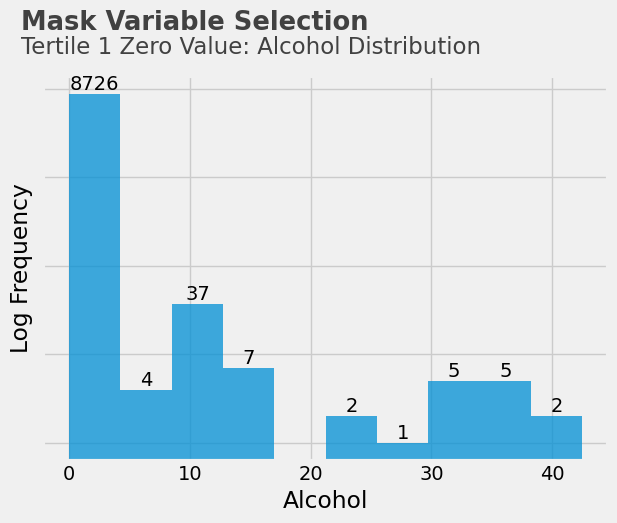

In [49]:
histogram(df = nutrition_df, col = 'alcohol',output_prefix = f'{notebook_nm}-alcohol-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Alcohol Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-theobromine-var-sel_theobromine_hist.png


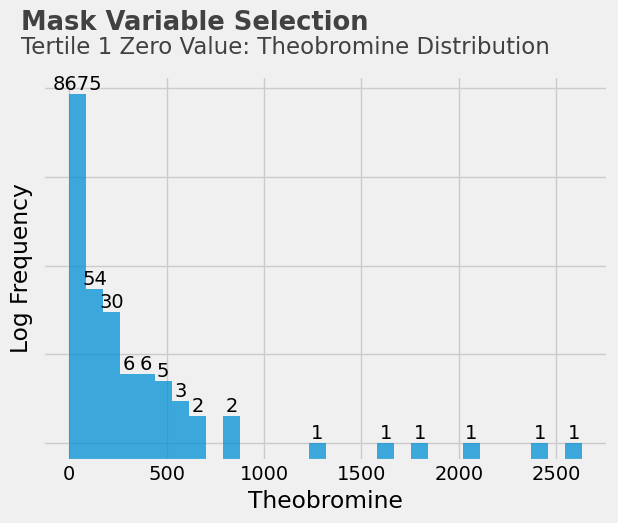

In [51]:
histogram(df = nutrition_df, col = 'theobromine',output_prefix = f'{notebook_nm}-theobromine-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 1 Zero Value: Theobromine Distribution', bins = 30, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-2-coefficient-variation_nutrient_variation_coefficient_barchart.png
Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-3-coefficient-variation_nutrient_variation_coefficient_barchart.png


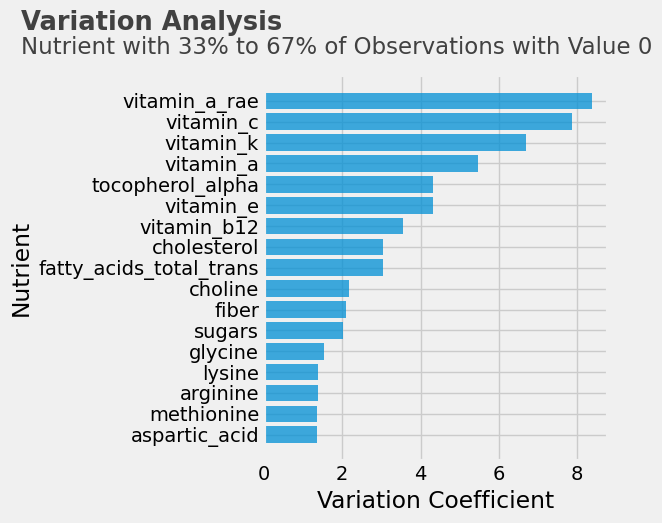

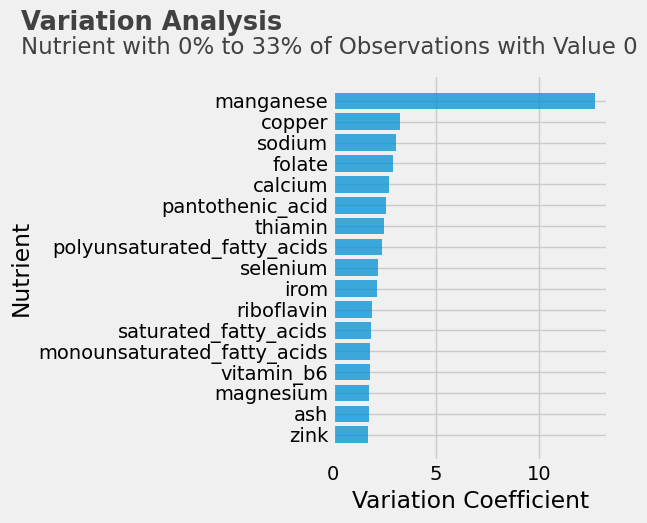

Image found in the "reports/figures" folder saved under 1.1-explorations-vitamin_a_rae-var-sel_vitamin_a_rae_hist.png


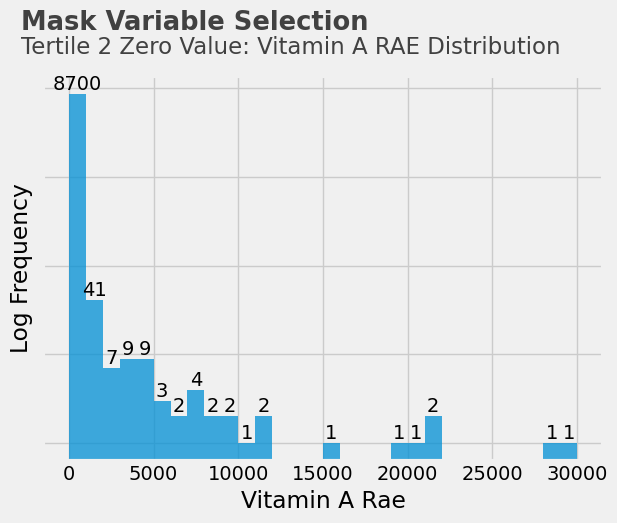

In [71]:
histogram(df = nutrition_df, col = 'vitamin_a_rae',output_prefix = f'{notebook_nm}-vitamin_a_rae-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 2 Zero Value: Vitamin A RAE Distribution', bins = 30, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-vitamin_b12-var-sel_vitamin_b12_hist.png


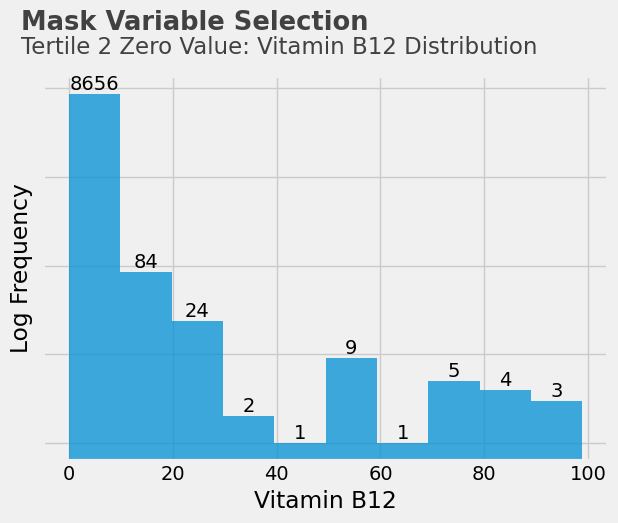

In [77]:
histogram(df = nutrition_df, col = 'vitamin_b12',output_prefix = f'{notebook_nm}-vitamin_b12-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 2 Zero Value: Vitamin B12 Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-cholesterol-var-sel_cholesterol_hist.png


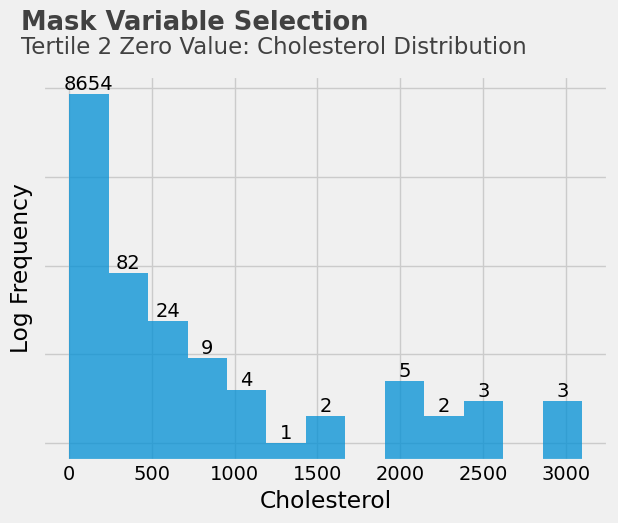

In [94]:
histogram(df = nutrition_df, col = 'cholesterol',output_prefix = f'{notebook_nm}-cholesterol-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 2 Zero Value: Cholesterol Distribution', bins = 13, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-fiber-var-sel_fiber_hist.png


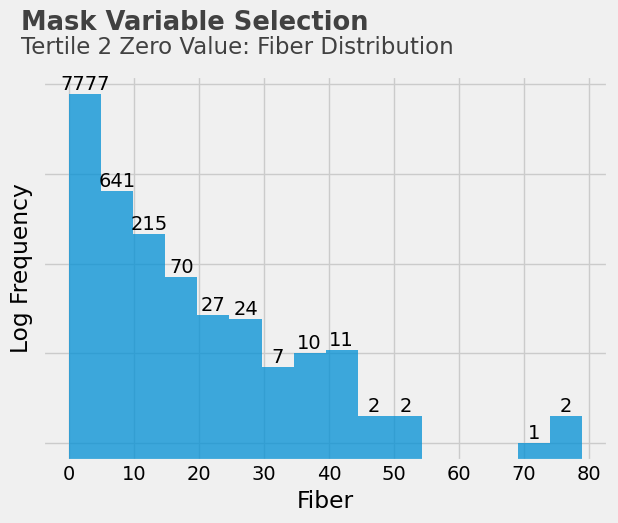

In [95]:
histogram(df = nutrition_df, col = 'fiber',output_prefix = f'{notebook_nm}-fiber-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 2 Zero Value: Fiber Distribution', bins = 16, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-sugar-var-sel_sugars_hist.png


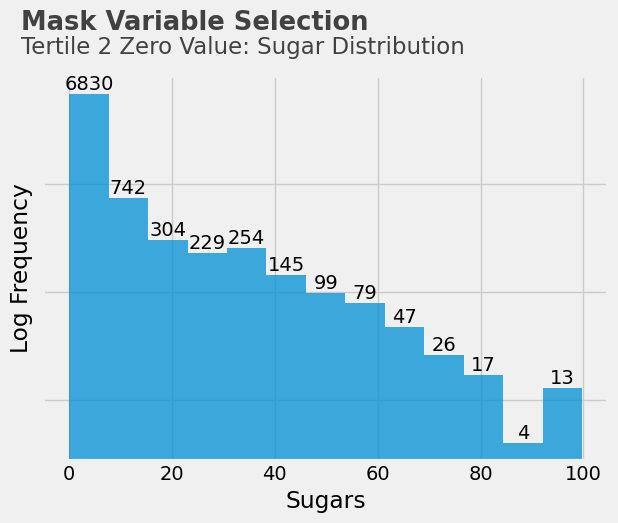

In [91]:
histogram(df = nutrition_df, col = 'sugars',output_prefix = f'{notebook_nm}-sugar-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 2 Zero Value: Sugar Distribution', bins = 13, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-zero-value-tert-3-coefficient-variation_nutrient_variation_coefficient_barchart.png


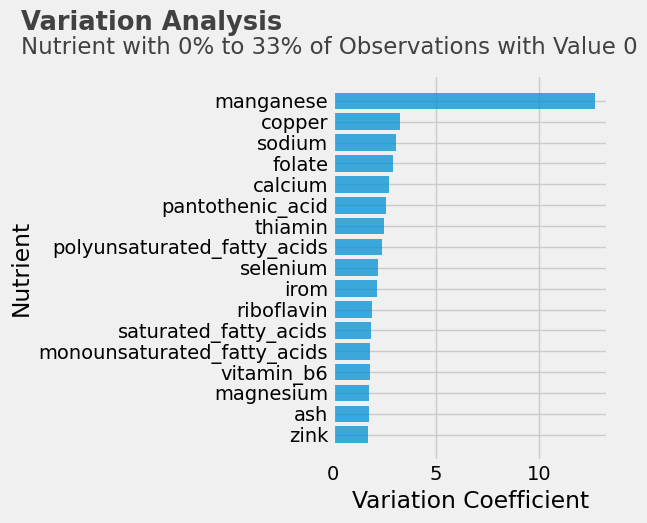

In [92]:
bar_plot(df = tertile_3_zero_val_col_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Nutrient with 0% to 33% of Observations with Value 0',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-zero-value-tert-3-coefficient-variation', n_cols = 17)

Image found in the "reports/figures" folder saved under 1.1-explorations-manganese-var-sel_manganese_hist.png


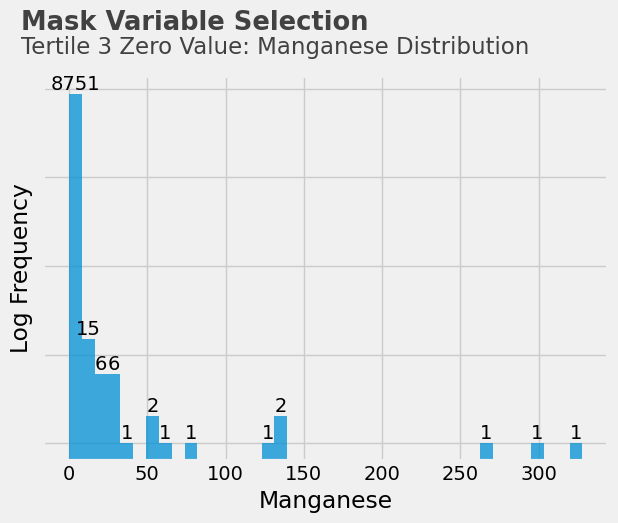

In [105]:
histogram(df = nutrition_df, col = 'manganese',output_prefix = f'{notebook_nm}-manganese-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 3 Zero Value: Manganese Distribution', bins = 40, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-zink-var-sel_zink_hist.png


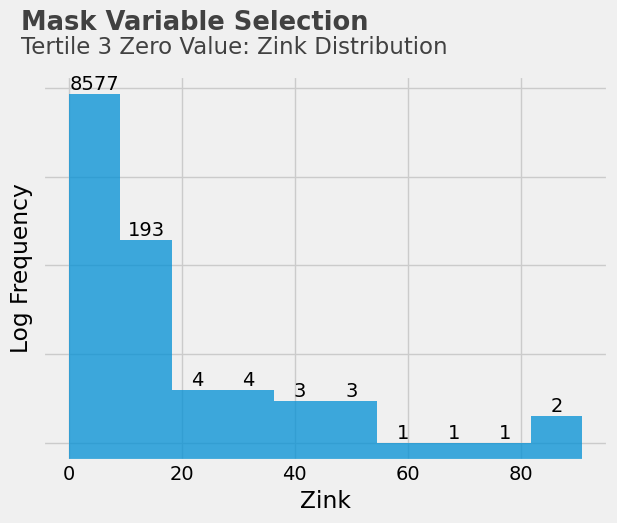

In [106]:
histogram(df = nutrition_df, col = 'zink',output_prefix = f'{notebook_nm}-zink-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 3 Zero Value: Zink Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-thiamin-var-sel_thiamin_hist.png


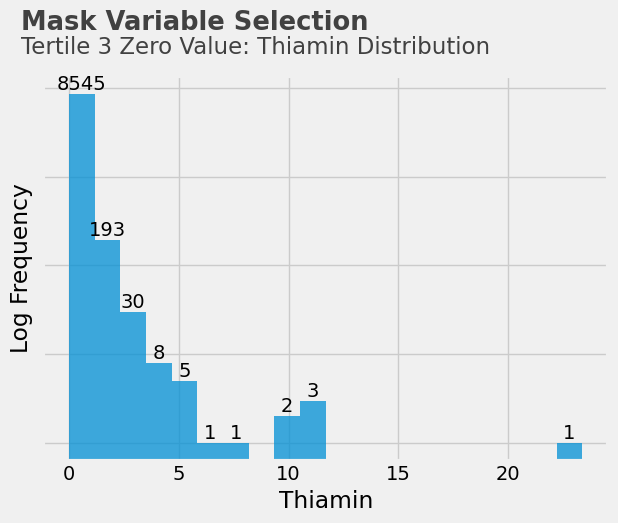

In [109]:
histogram(df = nutrition_df, col = 'thiamin',output_prefix = f'{notebook_nm}-thiamin-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 3 Zero Value: Thiamin Distribution', bins = 20, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-sodium-var-sel_sodium_hist.png


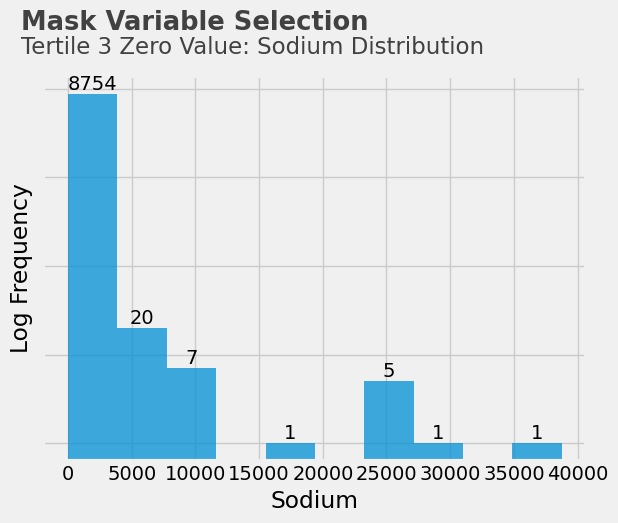

In [112]:
histogram(df = nutrition_df, col = 'sodium',output_prefix = f'{notebook_nm}-sodium-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 3 Zero Value: Sodium Distribution', bins = 10, log_scale = True)

Image found in the "reports/figures" folder saved under 1.1-explorations-water-var-sel_water_hist.png


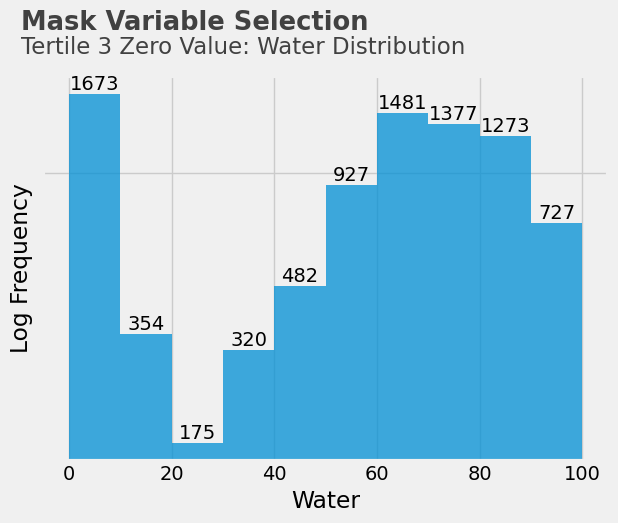

In [130]:
histogram(df = nutrition_df, col = 'water',output_prefix = f'{notebook_nm}-water-var-sel',fig_dir = fig_dir, title = 'Mask Variable Selection', subtitle = 'Tertile 3 Zero Value: Water Distribution', bins = 10, log_scale = True)

In [ ]:
nutrition_clean_df

### Step 3: Output Data 

In [ ]:
nutrition_clean_df.to_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv', index=False)

In [ ]:
with open(f'{ROOT_DIR}/references/nutrient_measure_units.json', 'w') as fp:
    json.dump(cleaner._measure_units, fp)